<a href="https://colab.research.google.com/github/Gaumit-Kauts/FoodHub-Data-Analysis/blob/main/FoodHub_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataframe.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* order_id is having integer data_type.
* customer_id is having integer data_type.
* restaurant_name is having object data_type.
* cuisine_type is having object data_type.
* cost_of_the_order is having float data_type.
* day_of_the_week is having object data_type.
* rating is having object data_type.
* food_preparation_time is having integer data_type.
* delivery_time is having integer data_type.

* Another aboservation is that all columns have the same count that is 1898. Therefore, that none of the columns have missing values.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isna().sum()
#there are no missing values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values.
I am not considering "Not Given" values under the rating column as a missing value.
* My assumption: if the values should have been
considered as null-values than the developer storing/modifying the data should have explicitely mentioned it as a null value rather than a string value : "not given"

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
#minimum food preparation time
min_time = df['food_preparation_time'].min()
#average food preparation time
avg_time = df['food_preparation_time'].mean().round(2)
#maximum food preparation time
max_time = df['food_preparation_time'].max()

print(min_time)
print(avg_time)
print(max_time)

20
27.37
35


#### Observations:
1. Minimum time to prepare food: 20 min
2. Average time to prepare food: 27.37 min
3. Maximum time to prepare food: 35 min






### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
value = 'Not given'
sum_value = df[df['rating'] == value]['rating'].count()
sum_value

# df.describe(exclude = 'number').T


736

#### Observations:
736 people did not give the rating.
* As compared to the total number of orders i.e. 1898, 736 people did not gave any ratings, making it a bit challneging for us to analyse the performance of the restaurants.
* Alternate solution is to analyse the performance of each restaurant based on the number of orders recieved to them.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
#the following function is referred from the uber_case_study for having better visualizations
# I have modifed the function a little as per my convenience

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """
    Boxplot and histogram combined with mean, median, lowest, and highest values displayed.

    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)

    # Calculate mean, median, lowest, and highest values
    mean_val = np.mean(feature)
    median_val = np.median(feature)
    lowest_val = np.min(feature)
    highest_val = np.max(feature)

    # Add mean to the histogram
    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')

    # Add median to the histogram
    ax_hist.axvline(median_val, color='black', linestyle='-', label=f'Median: {median_val:.2f}')

    # Add lowest value to the histogram
    ax_hist.axvline(lowest_val, color='red', linestyle='-', label=f'Lowest: {lowest_val:.2f}')

    # Add highest value to the histogram
    ax_hist.axvline(highest_val, color='red', linestyle='-', label=f'Highest: {highest_val:.2f}')

    # Add text annotations for mean, median, lowest, and highest values
    ax_hist.text(mean_val, ax_hist.get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='g', ha='center')
    ax_hist.text(median_val, ax_hist.get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='black', ha='center')
    ax_hist.text(lowest_val, ax_hist.get_ylim()[1]*0.7, f'Lowest: {lowest_val:.2f}', color='blue', ha='center')
    ax_hist.text(highest_val, ax_hist.get_ylim()[1]*0.6, f'Highest: {highest_val:.2f}', color='purple', ha='center')

    # Display legend
    ax_hist.legend()

    plt.show()



# **Observations on numerical variables**

## **Observations on 'cost of the order'**

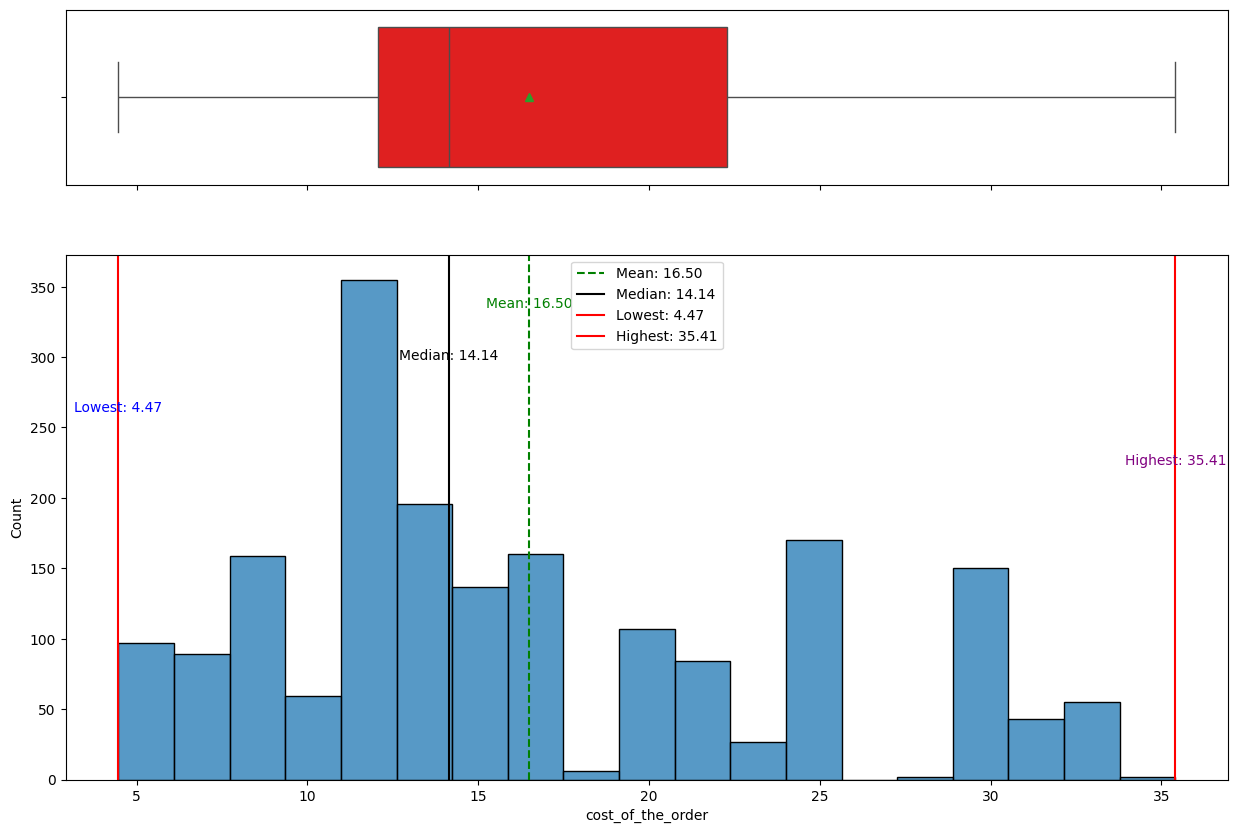

In [ ]:

histogram_boxplot(df['cost_of_the_order'])


Observations:
* As the mean is greater than the median (observed in the graph), it is being assumed that the data is slightly right skewed.
* The averga cost of the order is around 16.50 dollars.
* The median is 14.40 dollars.
* The lowest value of order is 4.47 dollars.
* The highest value of order is 35.41 dollars.
* After analysing the box plot I observed that there are no outliers in the data.

## **Observations on 'food preparation time'**

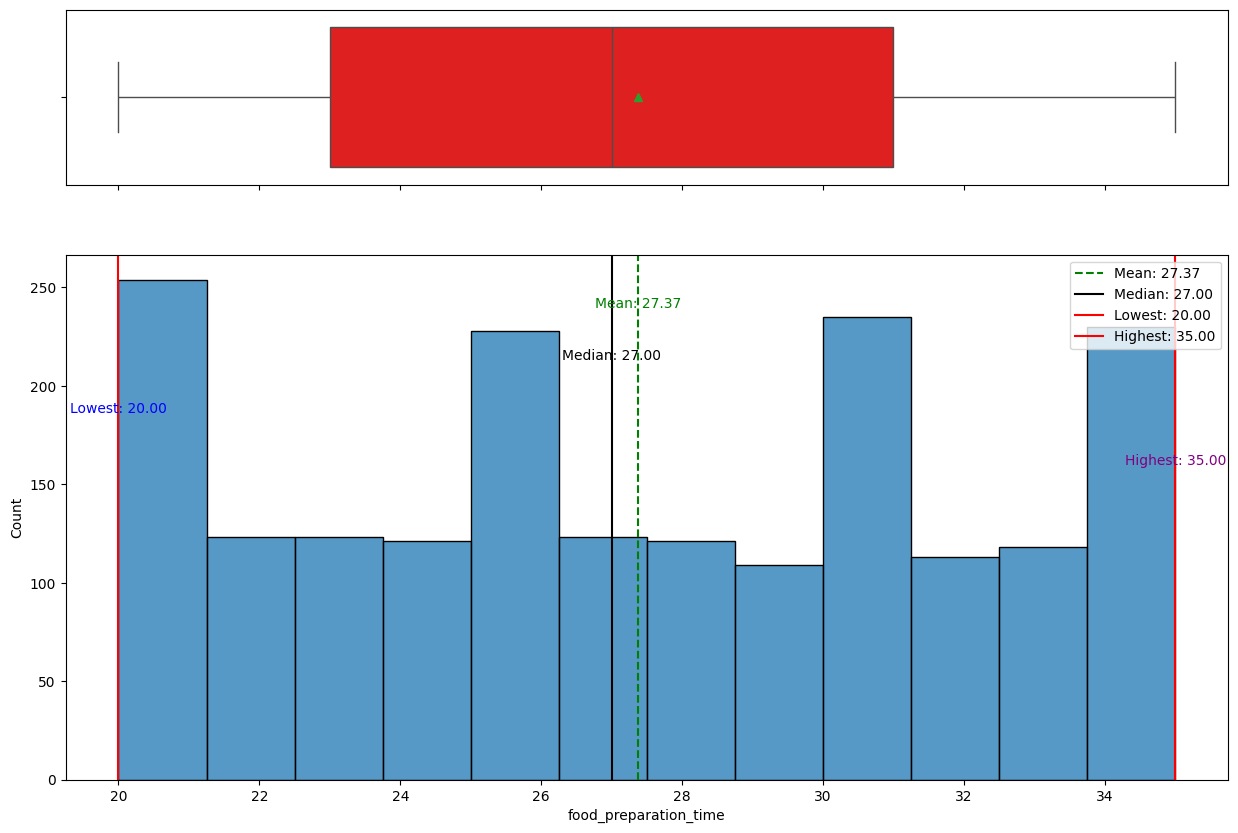

In [ ]:
histogram_boxplot(df['food_preparation_time'])

Observations:
* As the mean is slightly greater than the median (observed in the graph), it is being assumed that the data is very slightly right skewed.
* The average food preparation time is around 27.37 minutes.
* The median is 27 minutes.
* The lowest food preparation time is 20 minutes.
* The highest food preparation time is 35 minutes.
* After analysing the box plot I observed that there are no outliers in the data.

## **Observations on 'delivery time'**

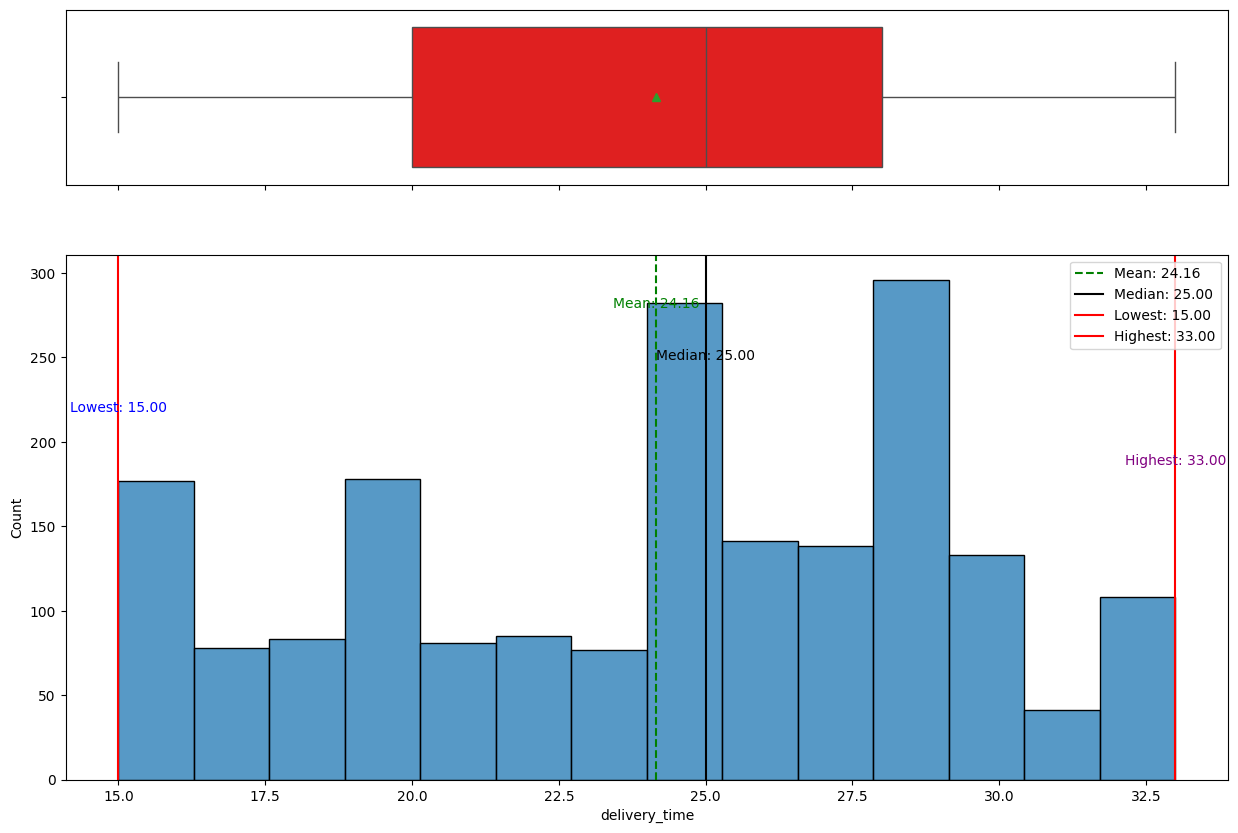

In [ ]:
histogram_boxplot(df['delivery_time'])

Observations:
* As the mean is slightly smaller than the median (observed in the graph), it is being assumed that the data is very slightly left skewed.
* The average delivery time is around 24.16 minutes.
* The median is 25 minutes.
* The lowest delivery time is 15 minutes.
* The highest delivery time is 33 minutes.
* After analysing the box plot I observed that there are no outliers in the data.

# **Observations on categorical variables**

## **Observations on 'day of the week'**

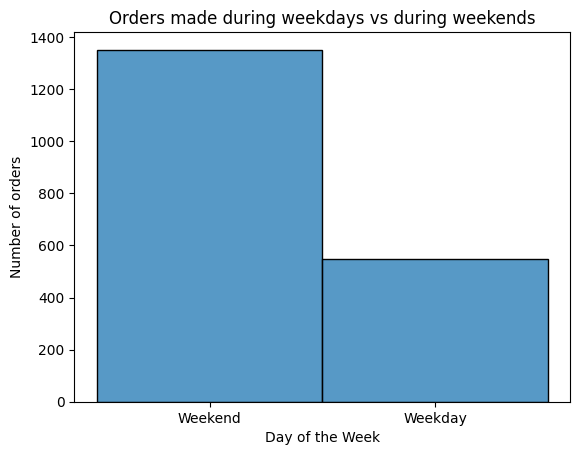

In [ ]:
#creating plot
sns.histplot(data = df, x = 'day_of_the_week')
#labelling the plot
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.title('Orders made during weekdays vs during weekends')
plt.show()

Observations:
* Based on the above histogram it is observed that people order less during weekdays and more during weekend.
* This can be interpreted in various ways.
1. People working during weekdays maybe either dining-in at the restaurants during those days or they might be bringing food from home.
2. People may be ordering more during weekend as after a long week many people prefer to sit at home and relax, therefore do not prefer cooking that much and hence order food.
3. Another observation that can be made based upon this is that most of the people using the app can maybe doing office jobs which is fixed from Monday till Saturday as other jobs (including store based/ construction based jobs) are most of the times done during weekends as well.
* [This is an observation made by taking the first two observations as an assumption]

## **Observations on 'Cuisine types'**

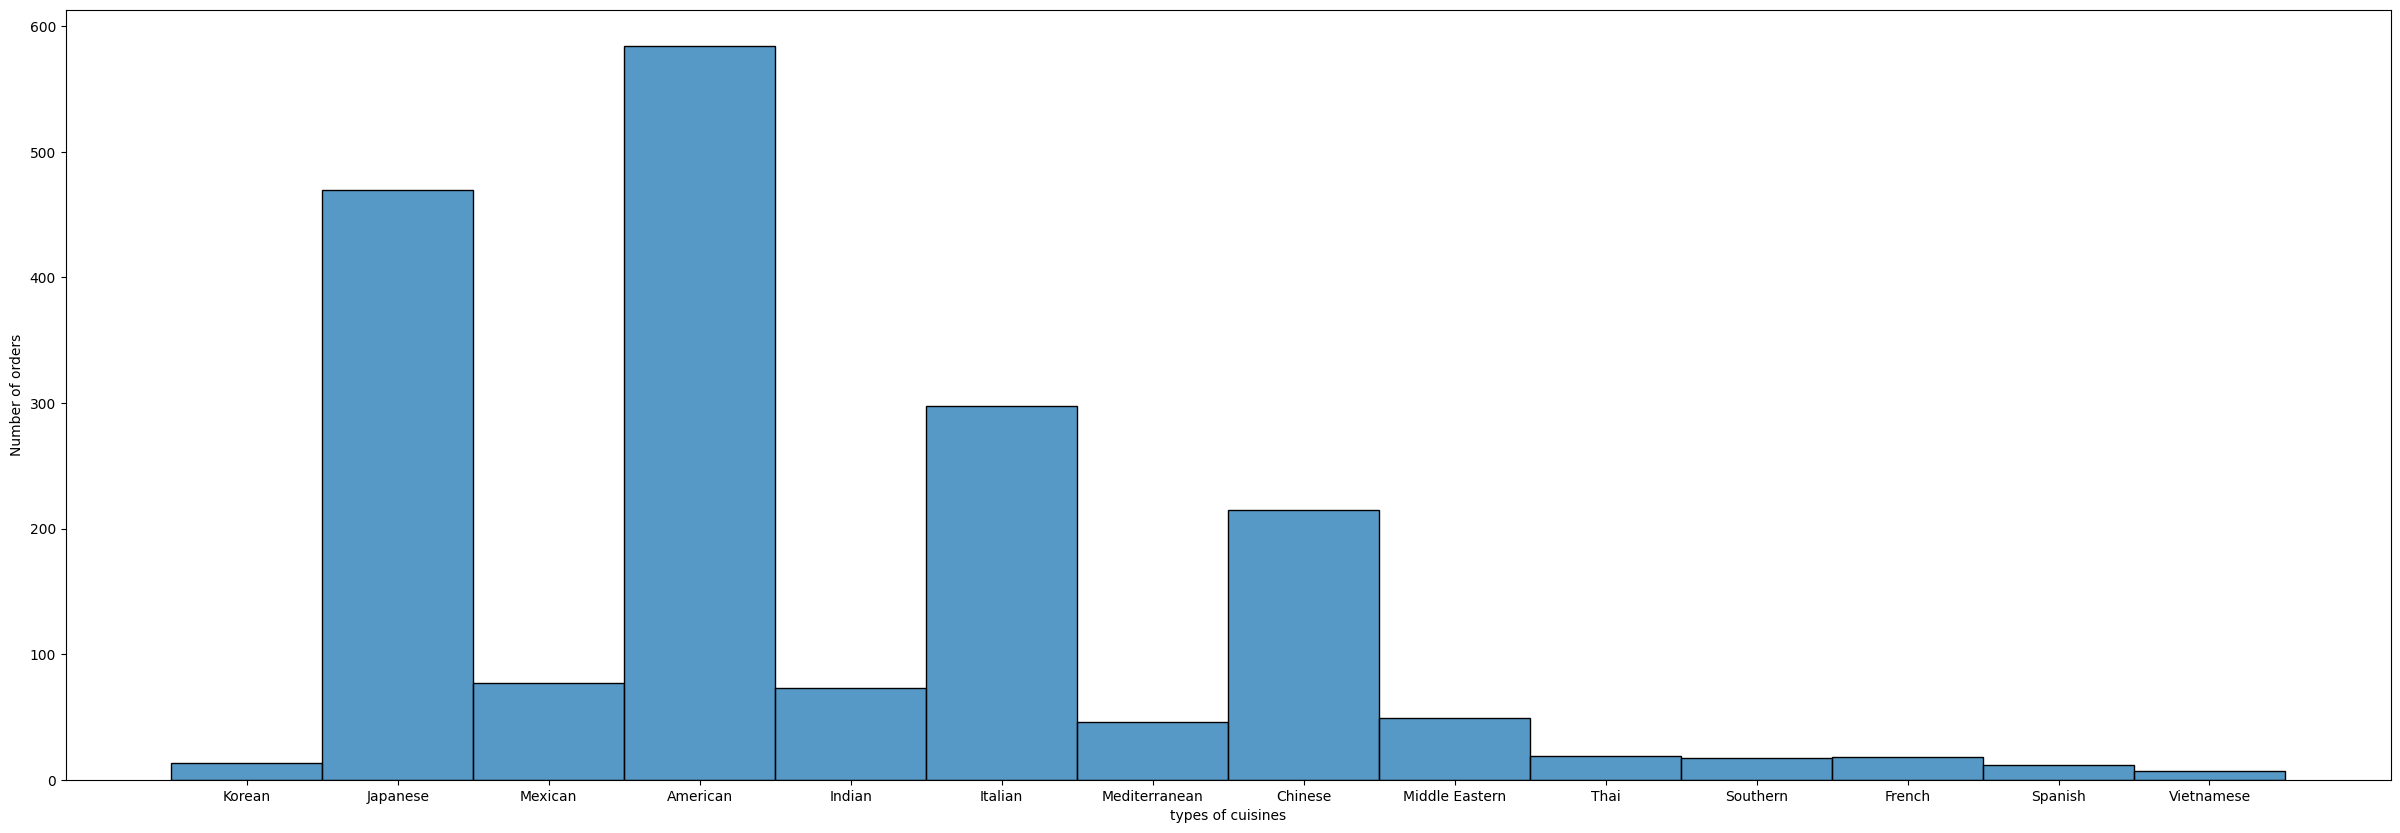

In [ ]:
#defining the plot size
plt.figure(figsize=(30, 10))
#creating the plot
sns.histplot(data = df, x = 'cuisine_type')
#labelling the plot
plt.ylabel('Number of orders')
plt.xlabel('types of cuisines')
plt.show()

Observations:
* The most liked cuisine amongst all with the highest number of orders is American cuisine, followed by Japenese, Italian and Chinese.
* The least liked cuisine amongst all with the lowest number of orders is Vietnamese cuisine.

## **Observations on 'rating'**

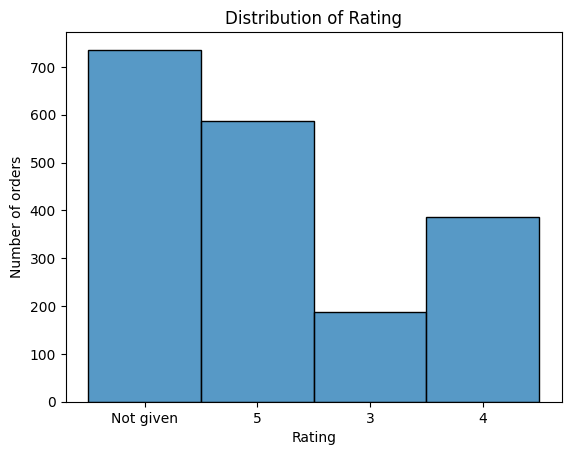

In [ ]:
#creating the plot
sns.histplot(data = df, x = 'rating')
#labelling the plot
plt.xlabel('Rating')
plt.ylabel('Number of orders')
plt.title('Distribution of Rating')
plt.show()


Observations:
From the graph, it is observed that there are only 4 responses to ratings by user i.e. rating-5, rating-4, rating-3 and rating-Not given.
* The fact that most of the users did not gave ratings to the restaurants makes it challenging for us to analyse the data appropriately.
* Out of the given ratings majority of the restaurants are given a 5 star rating, followed by a 4 star rating and a 3 star rating.



In [ ]:
#This is used as a reference for creating graphs of different kinds
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
#This is used as a reference for creating graphs of different kinds
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
#suming up the number of orders per restaurant and then sorting the values in descending order
df_name =df['restaurant_name'].value_counts().sort_values(ascending=False)
df_top = df_name.head()
df_top

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The top 5 restaurants in terms of number of orders recieved are :
1. Shake Shack with 219 orders recieved
2. The Meatball Shop with 132 orders recieved
3. Blue Ribbon Sushi with 119 orders recieved
4. Blue Ribbon Fried Chicken with 96 orders recieved
5. Parm with 68 orders recieved


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
#creating a dataframe where the day_of_the_week will be a weekend
df_weekends = df[df['day_of_the_week'] == 'Weekend']
#creating a dataframe to group the order with the cuisine type and count them individually for each cuisine type.
#now sorting these values in descending order
df_weekends_cuisine = df_weekends['cuisine_type'].value_counts().sort_values(ascending=False)
df_weekends_cuisine.head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is 'American' cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
#creating a dataframe where cost of the order is more than 20$
df_exp = df[df['cost_of_the_order']>20]
#calculating the percentage of orders which are more than 20$ as compared to the whole data column.
df_perc = (df_exp['cost_of_the_order'].count()/df['cost_of_the_order'].count())*100
print(df_perc.round(3),"%")

29.241 %


#### Observations:
29.241% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df_mean = df['delivery_time'].mean().round(2)
df_mean

24.16

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
#calculating the number of orders made by per customer.
df_customer = df['customer_id'].value_counts().sort_values(ascending=False)
df_customer.head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The top 3 most frequent customers with highest order:
1. Customer id: 52832 with 13 orders
2. Customer id: 47440 with 10 orders
3. Customer id: 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

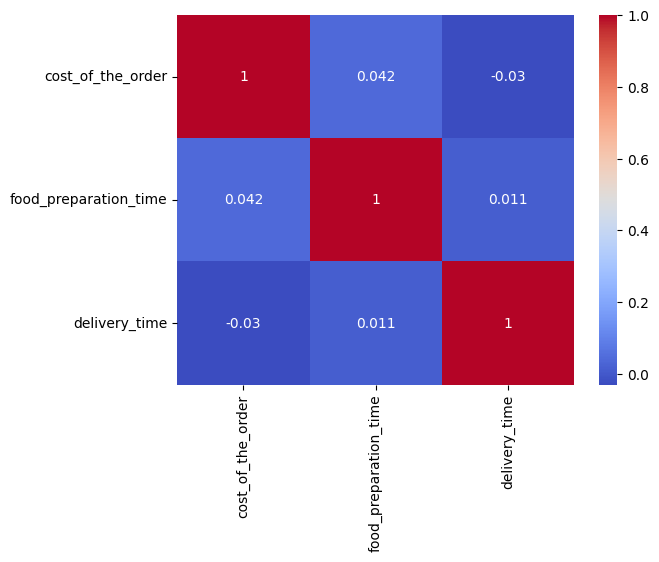

In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt
#creating a list of numerical variables for which we need to establish correlation
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

#creating a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')


plt.show()

Observations:
The above graph is not showing any correlation with each other.
* One of the reason for this can be the misleading "Not given" ratings as well.
* We will visualizse a heat map after dealing with the "Not given" values of ratings.
* If we include the "Non given" ratings in the dataset then we observe that:
1. Slight negative correlation between cost_of_the_order and delivery_time.
2. Very slight positive correlation between food_preparation_time and delivery_time.
3. Very slight positive correlation between food_preparation_time and cost_of_the_order.

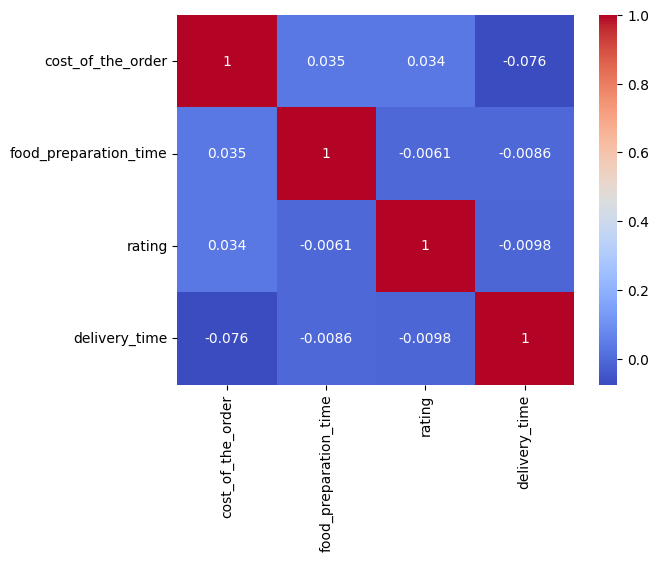

In [ ]:
#creating a dataframe where all the orders are rated by the customer
df_rating = df[df['rating'] != 'Not given']
#creating a list of numerical variables for which we need to establish correlation
updated_var = ['cost_of_the_order', 'food_preparation_time', 'rating', 'delivery_time']
corr = df_rating[updated_var].corr()
#creating the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Observations:
* If we exclude the "Non given" ratings in the dataset then we observe that:
1. Very slight negative correlation between cost_of_the_order and delivery_time.
2. Very slight negative correlation between food_preparation_time and delivery_time.
3. Very slight positive correlation between food_preparation_time and cost_of_the_order.
4. Very slight negative correlation between rating and delivery_time.
5. Very slight positive correlation between rating and cost_of_the_order.
6. Very slight negative correlation between food_preparation_time and rating.

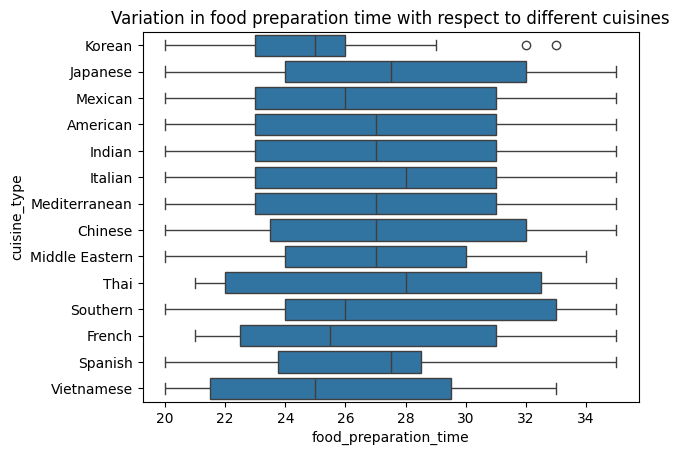

In [ ]:
#creating a boxplot
sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df)
#labelling the plot
plt.title('Variation in food preparation time with respect to different cuisines')
plt.show()


Observations:
The above graphs shows distribution of food preparation time amongst different cuisines.
* Korean cuisine has some outliers, hence most of the times it takes less time to prepare that kind of food except for a few times.
* The longest range of food preparation time is of the Thai cuisine.
* The Mexican, Italian, American, Indian and Mediterranean has the same time range with different median values.

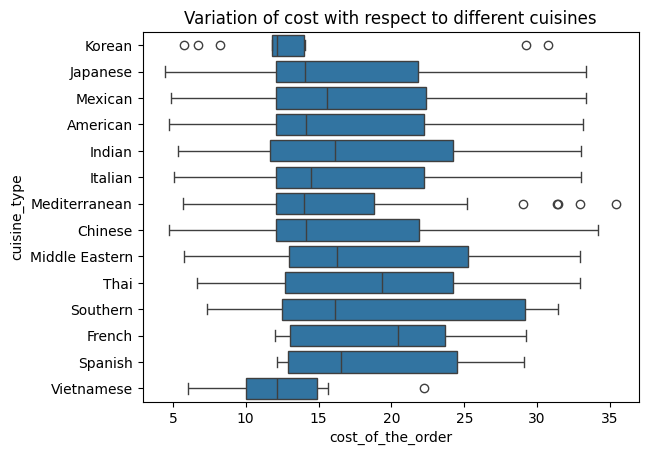

In [ ]:
#creating the boxplot
sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df)
plt.title('Variation of cost with respect to different cuisines')
plt.show()


Observations:
* This graph shows the variation oin the cost of the order with respect to the cuisine.
* Korean cuisine is having outliers and has a very small range of cost.
* The longest range of order cost is seen in Southern cuisine which gives the customer a variety of choices to order from based on their prices.
* One of the most affordable cuisines with less outliers is the Vietnamese Cuisine.

<Figure size 1000x600 with 0 Axes>

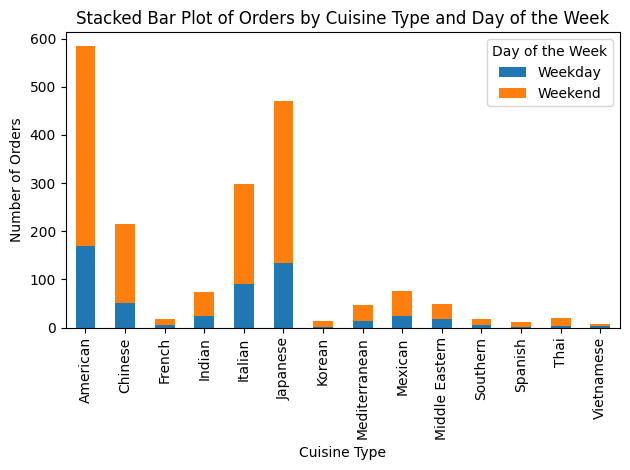

In [ ]:
# Count occurrences of each cuisine_type and day_of_week combination
df_counts = df.groupby(['cuisine_type', 'day_of_the_week']).size().reset_index(name='count')

# Pivot the dataframe to have cuisine_type as index and day_of_week as columns
df_pivot = df_counts.pivot(index='cuisine_type', columns='day_of_the_week', values='count')

# Plot stacked bar plot using seaborn
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Stacked Bar Plot of Orders by Cuisine Type and Day of the Week')

# Show the plot
plt.legend(title='Day of the Week', loc='upper right')
plt.tight_layout()
plt.show()

Observations:
* This graph shows that every cuisine irrespective of their order count is being order more during the weekend as compared to during the weekdays.

<Figure size 1000x600 with 0 Axes>

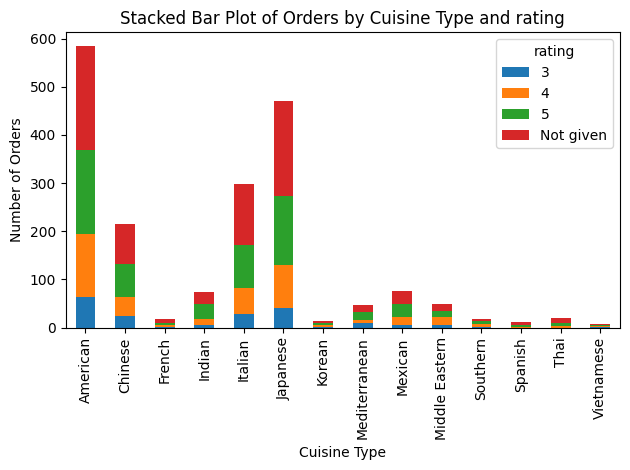

In [ ]:
# Count occurrences of each cuisine_type and rating combination
df_counts = df.groupby(['cuisine_type', 'rating']).size().reset_index(name='count')

# Pivot the dataframe to have cuisine_type as index and rating as columns
df_pivot = df_counts.pivot(index='cuisine_type', columns='rating', values='count').fillna(0)

# Plot stacked bar plot using seaborn
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Stacked Bar Plot of Orders by Cuisine Type and rating')

# Show the plot
plt.legend(title='rating', loc='upper right')
plt.tight_layout()
plt.show()

Observations:
* The 4 most ordered cuisines (American, Japanese, Chinese and Italian) have a big amount of rating value of "Not given".
* In general as well, all the cuisine has some significant part (compared to the order count) which is occupied by users which did not provide any rating, which ultimately makes the data difficult to analyse.

<Figure size 1000x600 with 0 Axes>

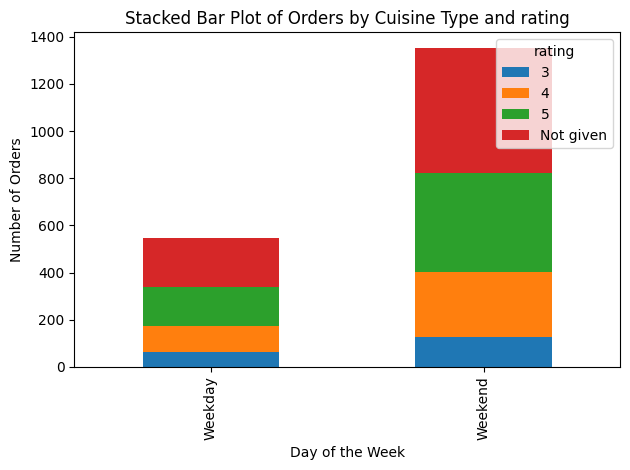

In [ ]:
# Count occurrences of each day_of_the_week and rating combination
df_counts = df.groupby(['day_of_the_week', 'rating']).size().reset_index(name='count')

# Pivot the dataframe to have day_of_the_week as index and rating as columns
df_pivot = df_counts.pivot(index='day_of_the_week', columns='rating', values='count').fillna(0)

# Plot stacked bar plot using seaborn
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Stacked Bar Plot of Orders by Cuisine Type and rating')

# Show the plot
plt.legend(title='rating', loc='upper right')
plt.tight_layout()
plt.show()

Observations:
* Same trend has been observed here that with the increasing number of orders during the weekend there is a significant number of orders which are not rated. Hence making the data difficult to analyse.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
#Assuming that the "Not given" rating is not going to get included in the rating cound

#making a dataframe where all the rating is not equal to "Not given"
df_update = df[df['rating'] != 'Not given'].copy()


#changing the data type of rating column from object (mixed values) to integer
df_update['rating'] = df_update['rating'].astype(int)

#creating columns for rating count and average rating
restaurant_stats = df_update.groupby('restaurant_name').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()
# restaurants having more than 50 rated orders and more than 4 average rating
eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['average_rating'] > 4)
]

eligible_restaurants


,restaurant_name,rating_count,average_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:
Following are the restaurants with more than 50 rating counts andaverage rating higher than 4.

1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
df_20 = df.copy()
df_15 = df.copy()

#creating dataframe with cost of the order more than 20$
df_20 = df[df['cost_of_the_order'] > 20.0].copy()
#creating dataframe with cost of the order more than 5$ but less than 20$.
df_15 = df[(df['cost_of_the_order'] > 5.0) & (df['cost_of_the_order'] <= 20.0)].copy()
#sorting the dataframes in descending order with respect to the cost_of_the_order
df_20_rev = df_20.sort_values(by='cost_of_the_order', ascending=False)
df_15_rev = df_15.sort_values(by='cost_of_the_order', ascending=False)
#summing up the costs of the order
df_20_rev = df_20['cost_of_the_order'].sum()
df_15_rev = df_15['cost_of_the_order'].sum()
#calculating net revenue
net_revenue = df_20_rev*0.25 + df_15_rev*0.15
print("Total revenue generated by the company across all the orders is:",net_revenue.round(2))


Total revenue generated by the company across all the orders is: 6166.3




---



#### Observations:
Total revenue generated by the company across all the orders is: 6166.3$.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
#creating a new column of total time whichh has the sum of preparation time and delivery time
df['total_time'] = df['food_preparation_time']+df['delivery_time']
#creating a dataframe having total time more than 60
df_more_than_60 = df[df['total_time'] > 60]
#total number of orders
total_orders = len(df)
#number of orders which takes more than 60 minutes
orders_above_60 = len(df_more_than_60)
#percentage of orders which takes more than 60 minutes
perc = round((orders_above_60/total_orders)*100,2)
perc


10.54

#### Observations:
This is the percentage of order that takes more than 60 minutes: 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
#grouping the day_of_the_week column with the mean delivery time for each categorical value
(df.groupby('day_of_the_week')['delivery_time'].mean()).round(2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

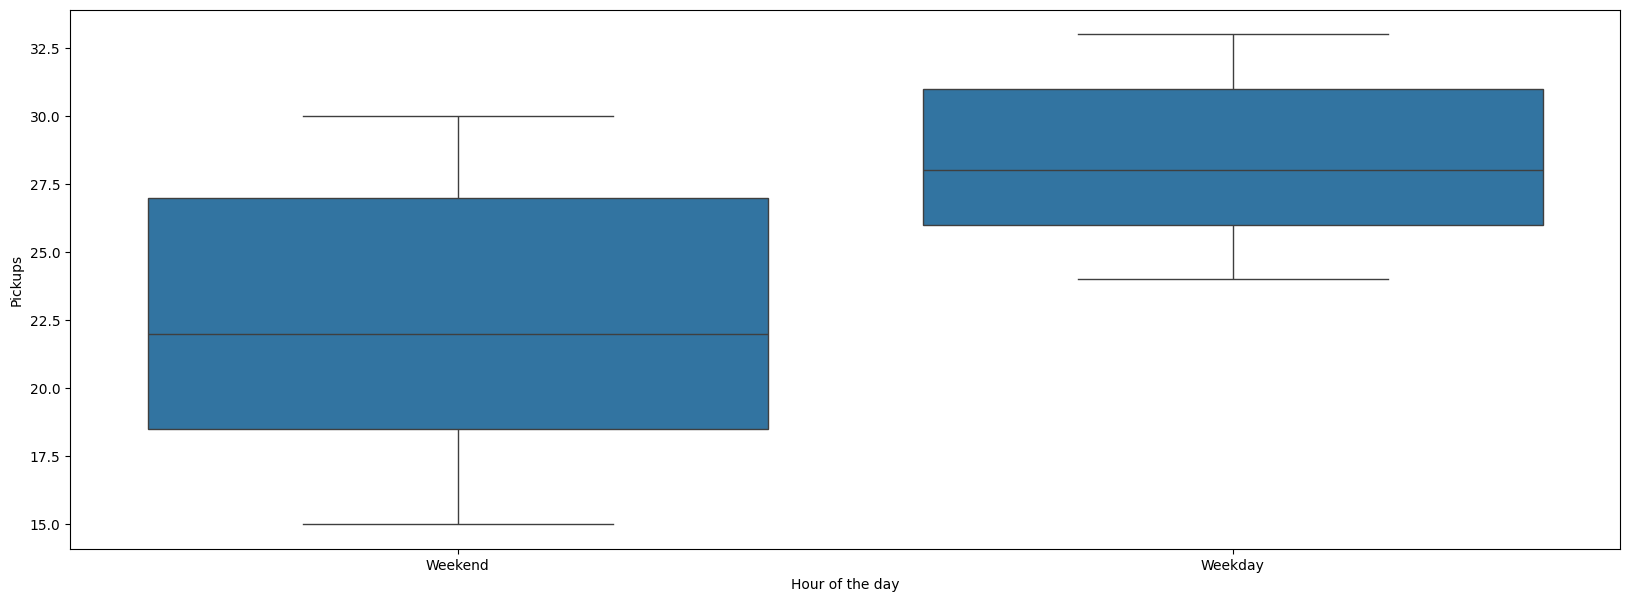

In [ ]:
plt.figure(figsize = (20, 7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time")
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

#### Observations:
* The mean delivery time during weekday is 28.34 minutes.
* The mean delivery time during weekend is 22.47 minutes.

The mean delivery time during weekday is more than the mean delivery time during weekend. This can be there due to the higher traffic experienced by the delivery individual during the weekday.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  One of the conclusion that has been derived from the analysis is that the variables of the data does not have a strong correlation with each other.
* Secondly due to the "Not given" rating values, there is a lot of uncertainity in the analysis.
* Based on the current data we can still assume something based on a strong evidence coming from the data: one is that mean delivery time is less on the weekend as compared to the weekday which gives us an insight regarding the traffic conditions during weekends and weekdays.
* Secondly, based on this analysis we can still get a performance report of the restaurants.
* Thirdly, we also analyzed that the number orders during weekend is more as compared to weekdays. This can be due to various reasons. One reason can be that every individual either bring lunch from home or dine-in at the restaurant during weekday so as to eat fresh food or home cooked food.
* Further we can also conclude that people's favourite most cuisine based on this data is American Cuisine.
* Last but not the least thing which is being analyzed that there is a huge amount of data where the value of rating is equal to "Not given" which is making the data insufficient for us to predict trends or do unbiased analysis. However, although there is a significant amount of data without ratings but the data which is rated by the users has no order count with rating less than 3 and a very less order count with a rating of 3 which shows that the restaurants enrolled in the app is genuinely performing well (above average).

### Recommendations:

*  One of the recommendations on the analysis level is to get more data so as to get the probability of each rating occuring so as to establish a probability distribution graph (using pmf) which can help us poppulate non given values in the ratings column.
* Furthermore, a 10$ gift card can be sent to customer who have been rating every single order during the whole month so as to motivate customers to rate the order.
* Business based recommendation: As we know that there are more orders during weekends as compared to weekdays then we should ensure that there are more drivers available during weekends so as to meet the supply chain demand.
* Secondly, for promoting the restaurants having low customer interaction, we can introduce certain promotions including "Buy one get One free" or " free sandwhich if the customer spends more than 35 dollars". With this approach we can imporve customer interactions with less famous restaurants as well.
* It has been observed that the difference between people ordering "American" cuisine with respect to other cuisines is quite high and should be reduced by offering differents cuisines at cheaper price with proper marketing. This strategy can work to promote other cuisines and can be introduced for a temporary period.

In [ ]:
#the code for converting the .ipynb to .html
!jupyter nbconvert --to html /content/drive/MyDrive/MIT/FDS_Project_LearnerNotebook_FullCode.ipynb


[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1339853 bytes to /content/drive/MyDrive/MIT/FDS_Project_LearnerNotebook_FullCode.html


---